In [ ]:
!pip install numpy
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# Sampling Technique
from imblearn.over_sampling import SMOTE

# Encoding
from sklearn.preprocessing import LabelEncoder

# Data split
from sklearn.model_selection import train_test_split

# Model Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

# Models 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV



In [ ]:
# Read data into a dataframe 
loan_data = pd.read_csv("/content/sample_data/credit_train.csv")

# Display top of dataframe
loan_data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


In [ ]:
# Check the total rows and columns
loan_data.shape

(100000, 19)

In [ ]:
# Check data types
loan_data.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [ ]:
# Drop Unnecessary Columns
loan_data.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()

  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)

  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})

  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)

  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")

  # Return the dataframe with missing information
  return mis_val_table_ren_columns

missing_values_table(loan_data)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53141,53.1
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


In [ ]:
# Drop the columns with > 50% missing
loan_data.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [ ]:
# Check null rows
loan_data[loan_data['Years of Credit History'].isnull() == True]
# It shows the last 514 observations are NaN values.

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


In [ ]:
# Drop the last 514 empty rows
loan_data.drop(loan_data.tail(514).index, inplace=True) # drop last 514 rows
missing_values_table(loan_data)

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19056,19.2
Annual Income,19056,19.2
Years in current job,4195,4.2
Bankruptcies,203,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


In [ ]:
# Drop the 'Credit Score', 'Annual Income' id there is a missing data
columns_to_drop = [ 'Credit Score', 'Annual Income']

for col in columns_to_drop: loan_data = loan_data.dropna(subset=[col])

missing_values_table(loan_data)

Your selected dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Years in current job,3389,4.2
Bankruptcies,161,0.2
Tax Liens,6,0.0
Maximum Open Credit,1,0.0


In [ ]:
loan_data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,8.043000e+04,80430.000000,8.043000e+04,80430.000000,80430.000000,80430.000000,80430.000000,8.043000e+04,8.042900e+04,80269.000000,80424.000000
mean,1.446838e+07,1077.291682,1.378107e+06,18509.322191,18.184324,11.141552,0.170036,2.949444e+05,7.330030e+05,0.118738,0.030078
std,3.479460e+07,1477.035626,1.082257e+06,12234.167078,7.006511,5.026735,0.487604,3.808698e+05,6.873293e+06,0.353233,0.264684
min,1.124200e+04,585.000000,7.662700e+04,0.000000,3.700000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.865215e+05,705.000000,8.487680e+05,10244.420000,13.500000,8.000000,0.000000,1.125750e+05,2.718540e+05,0.000000,0.000000
50%,3.246980e+05,724.000000,1.173896e+06,16255.355000,16.900000,10.000000,0.000000,2.104345e+05,4.663340e+05,0.000000,0.000000
75%,5.496260e+05,741.000000,1.650530e+06,24049.915000,21.700000,14.000000,0.000000,3.681060e+05,7.803620e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


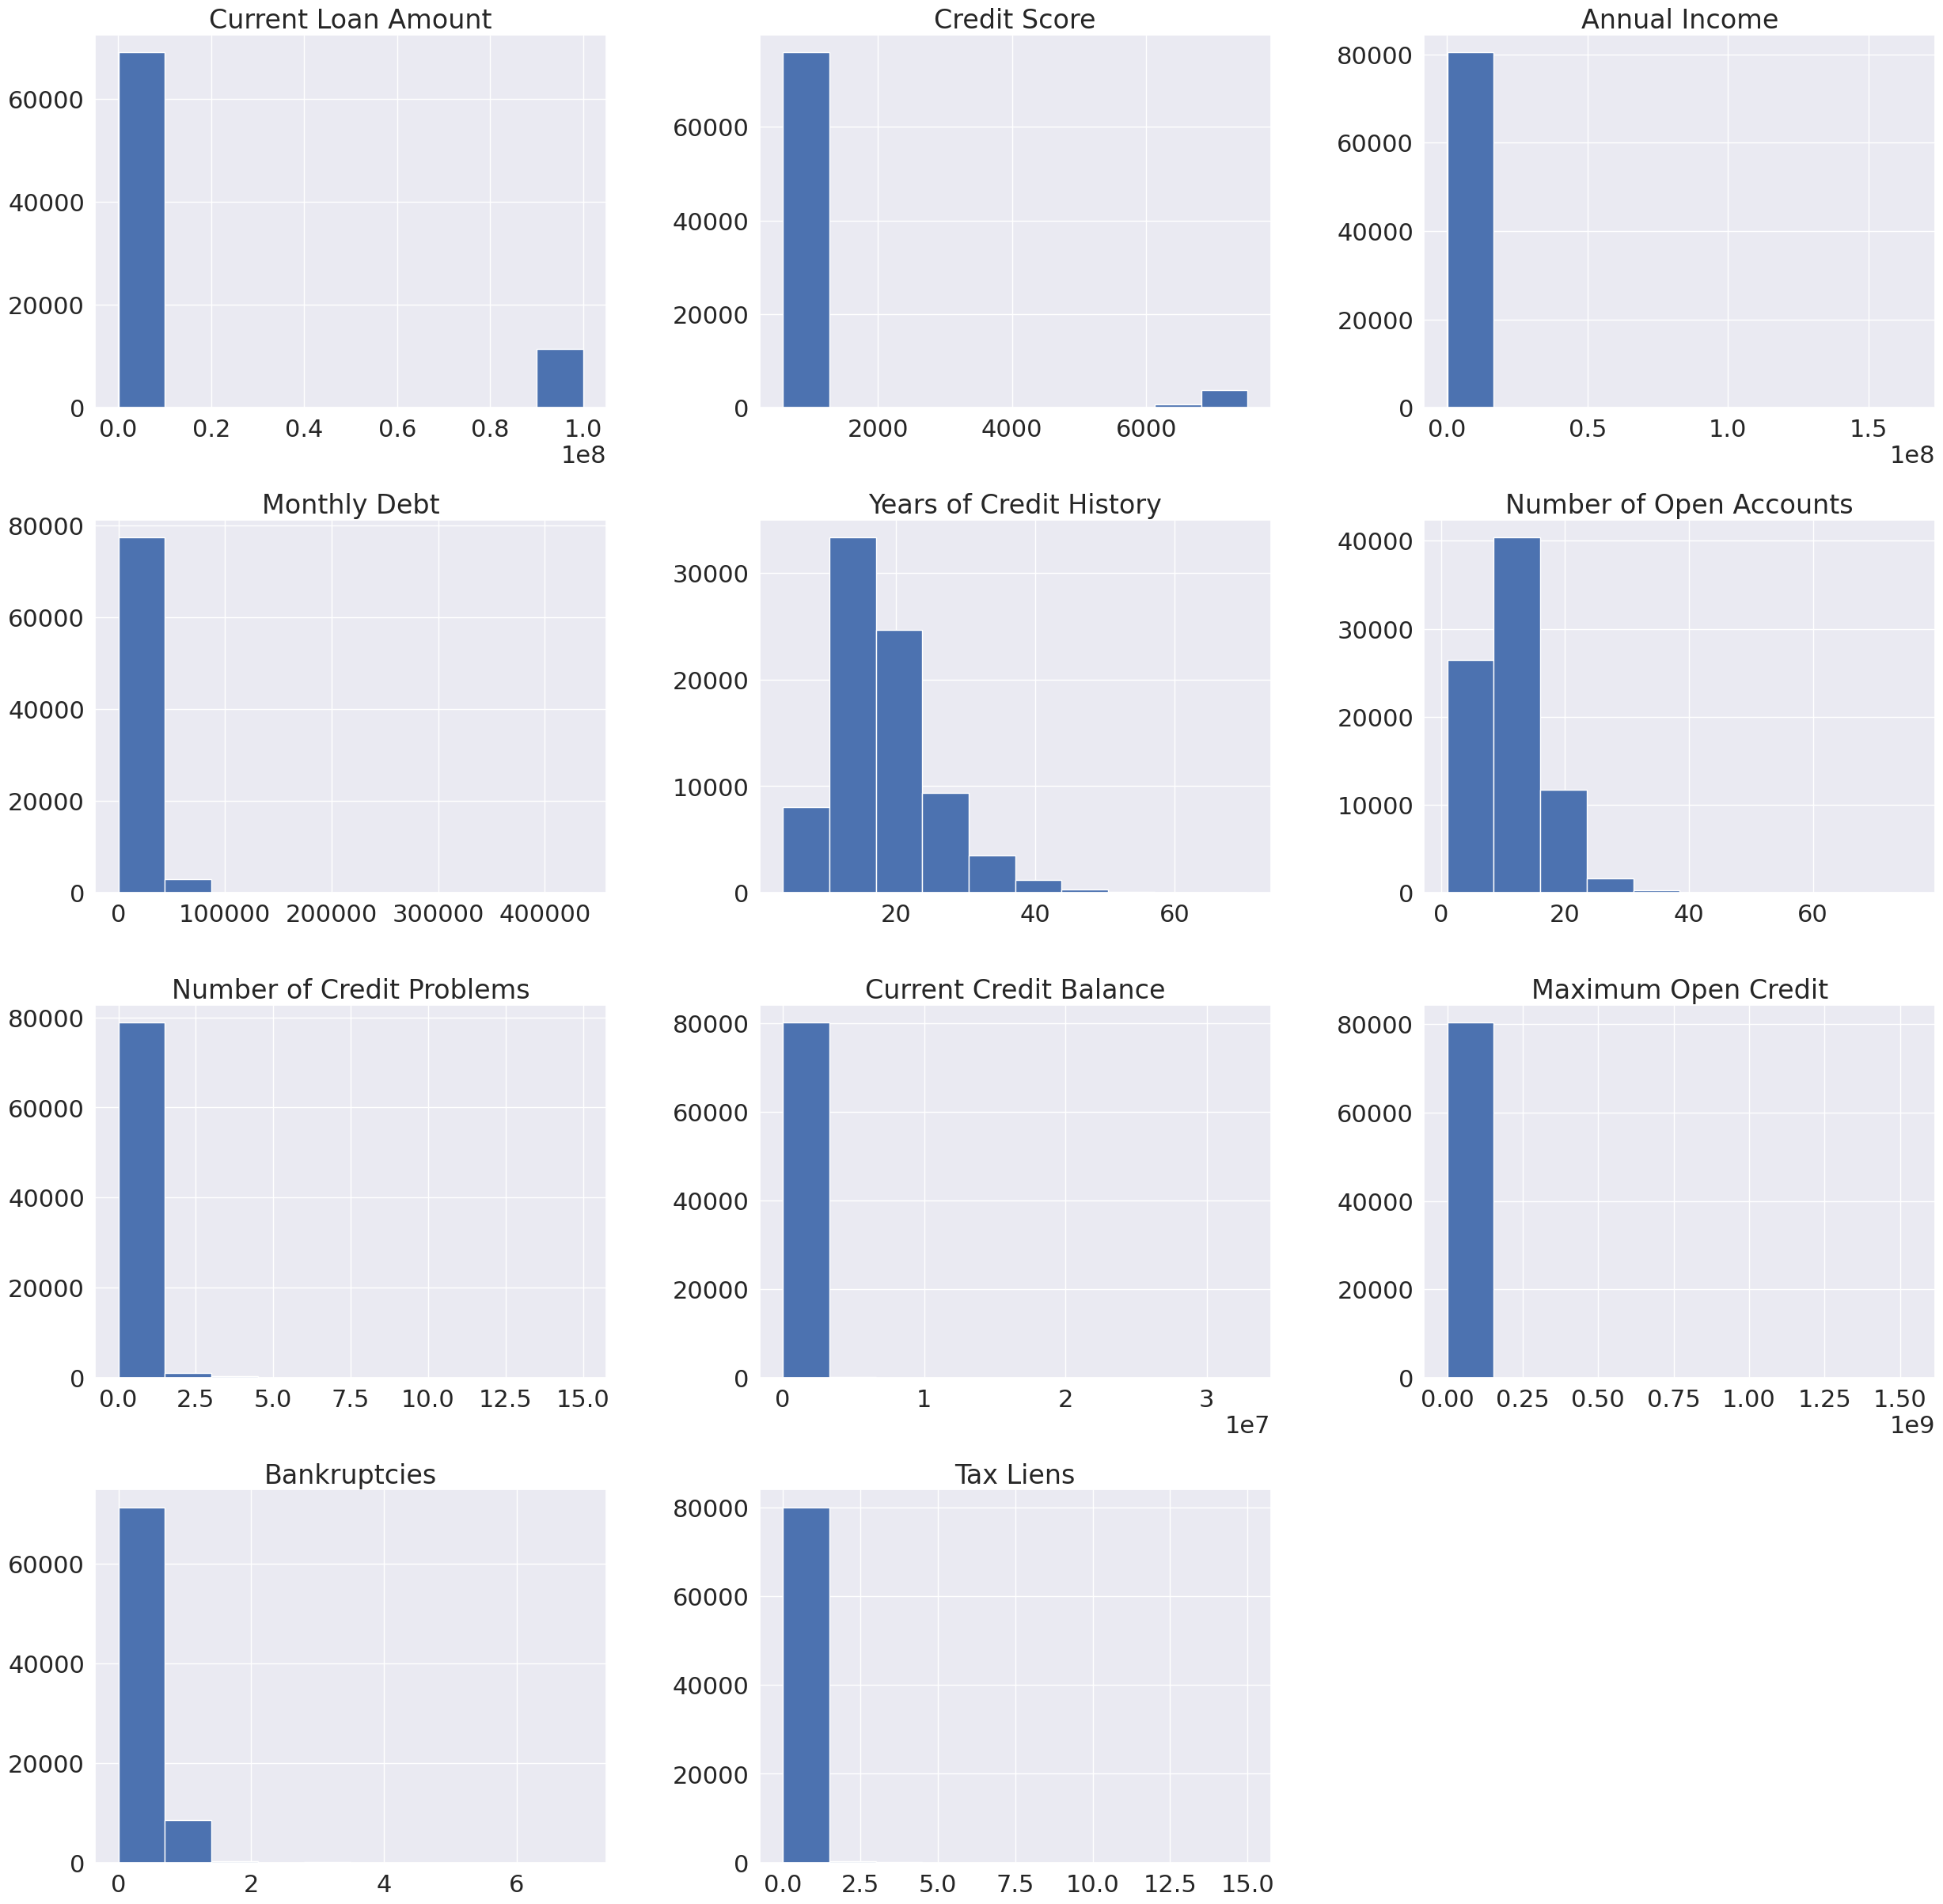

In [ ]:
import matplotlib.pyplot as plt

loan_data.hist(bins = 10 , figsize= (30,30))
plt.show()

In [ ]:
# Based on the histogram above, mean is chosen to impute the missing value for the three columns as they are numeric and not skewed

# Impute missing value to mean numeric attributes such as Bankruptcies, Tax Liens, Maximum Open Credit	
loan_data.fillna(loan_data.mean(), inplace=True)
missing_values_table(loan_data)

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Years in current job,3389,4.2


Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Years in current job,3389,4.2


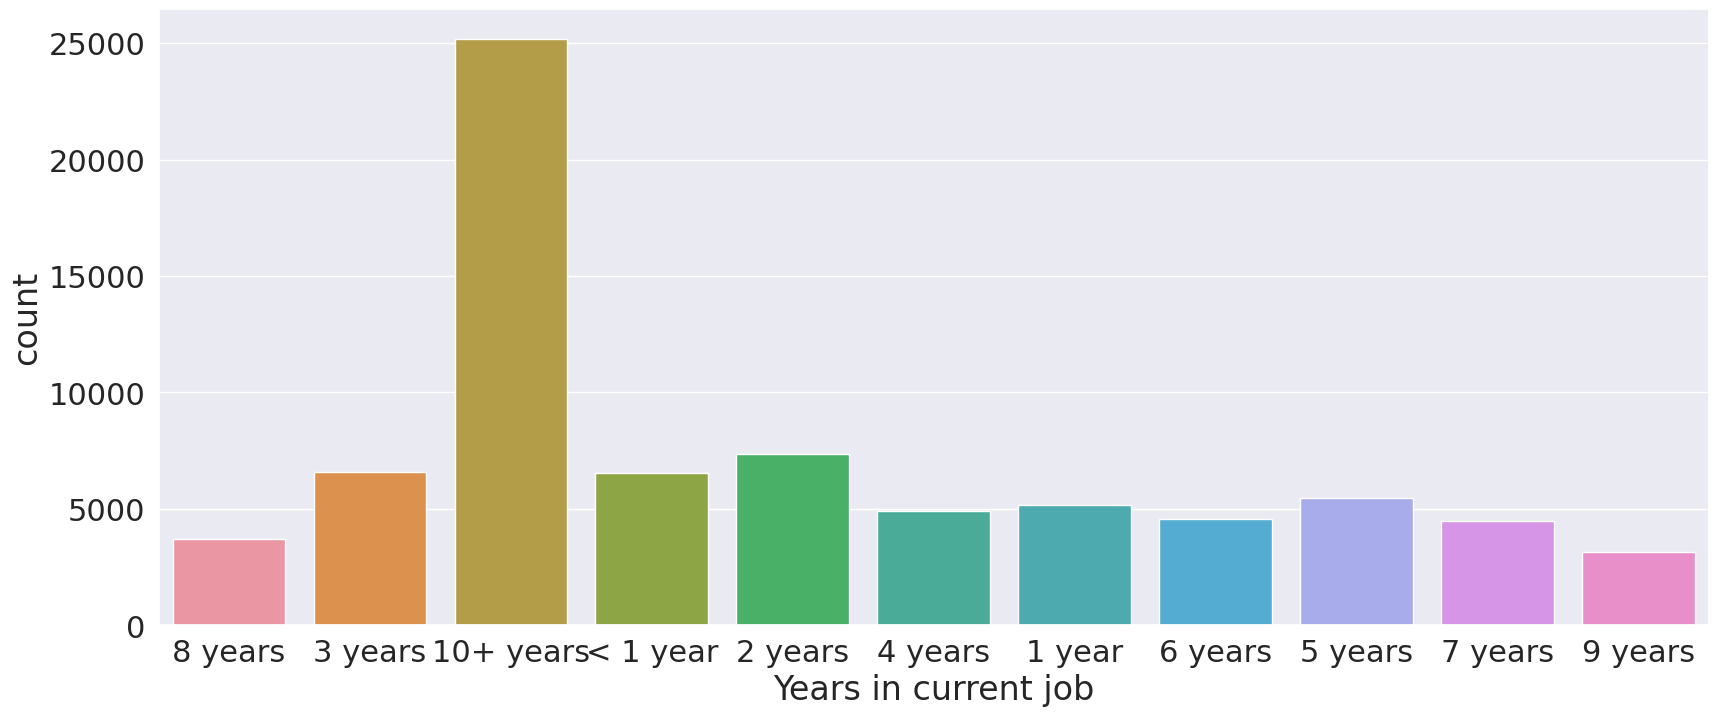

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x= loan_data['Years in current job'])

missing_values_table(loan_data)

In [ ]:
# Since'10+ years' is mod, fill missng value with '10+ years'.
loan_data.fillna('10+ years', inplace=True)
missing_values_table(loan_data)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
# Change the 'Years in current job' into numeric value
loan_data['Years in current job']=loan_data['Years in current job'].replace(['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years'],[0.5,1,2,3,4,5,6,7,8,9,10])
loan_data.head(10)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
2,Fully Paid,99999999,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,Fully Paid,347666,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
5,Charged Off,206602,Short Term,7290.0,896857.0,10.0,Home Mortgage,Debt Consolidation,16367.74,17.3,6,0,215308,272448.0,0.0,0.0
6,Fully Paid,217646,Short Term,730.0,1184194.0,0.5,Home Mortgage,Debt Consolidation,10855.08,19.6,13,1,122170,272052.0,1.0,0.0
8,Fully Paid,548746,Short Term,678.0,2559110.0,2.0,Rent,Debt Consolidation,18660.28,22.6,4,0,437171,555038.0,0.0,0.0
9,Fully Paid,215952,Short Term,739.0,1454735.0,0.5,Rent,Debt Consolidation,39277.75,13.9,20,0,669560,1021460.0,0.0,0.0
10,Fully Paid,99999999,Short Term,728.0,714628.0,3.0,Rent,Debt Consolidation,11851.06,16.0,16,0,203965,289784.0,0.0,0.0
12,Fully Paid,99999999,Short Term,740.0,776188.0,0.5,Own Home,Debt Consolidation,11578.22,8.5,6,0,134083,220220.0,0.0,0.0
13,Fully Paid,99999999,Short Term,743.0,1560907.0,4.0,Rent,Debt Consolidation,17560.37,13.3,10,1,225549,496474.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
loan_data['Loan Status']=label.fit_transform(loan_data['Loan Status'])
loan_data['Term']=label.fit_transform(loan_data['Term'])
loan_data['Home Ownership']=label.fit_transform(loan_data['Home Ownership'])
dummy=pd.get_dummies(loan_data['Purpose'],prefix='Purpose')
loan_data=pd.concat([loan_data,dummy],axis=1)
loan_data.drop(['Purpose'],axis=1,inplace=True)

In [ ]:
loan_data.head(10)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Monthly Debt,Years of Credit History,Number of Open Accounts,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,1,445412,1,709.0,1167493.0,8.0,1,5214.74,17.2,6,...,0,0,0,0,0,0,0,0,0,0
2,1,99999999,1,741.0,2231892.0,8.0,2,29200.53,14.9,18,...,0,0,0,0,0,0,0,0,0,0
3,1,347666,0,721.0,806949.0,3.0,2,8741.90,12.0,9,...,0,0,0,0,0,0,0,0,0,0
5,0,206602,1,7290.0,896857.0,10.0,1,16367.74,17.3,6,...,0,0,0,0,0,0,0,0,0,0
6,1,217646,1,730.0,1184194.0,0.5,1,10855.08,19.6,13,...,0,0,0,0,0,0,0,0,0,0
8,1,548746,1,678.0,2559110.0,2.0,3,18660.28,22.6,4,...,0,0,0,0,0,0,0,0,0,0
9,1,215952,1,739.0,1454735.0,0.5,3,39277.75,13.9,20,...,0,0,0,0,0,0,0,0,0,0
10,1,99999999,1,728.0,714628.0,3.0,3,11851.06,16.0,16,...,0,0,0,0,0,0,0,0,0,0
12,1,99999999,1,740.0,776188.0,0.5,2,11578.22,8.5,6,...,0,0,0,0,0,0,0,0,0,0
13,1,99999999,1,743.0,1560907.0,4.0,3,17560.37,13.3,10,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
encoded_loan_data = loan_data.copy()

loan_data.head(10)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Monthly Debt,Years of Credit History,Number of Open Accounts,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,1,445412,1,709.0,1167493.0,8.0,1,5214.74,17.2,6,...,0,0,0,0,0,0,0,0,0,0
2,1,99999999,1,741.0,2231892.0,8.0,2,29200.53,14.9,18,...,0,0,0,0,0,0,0,0,0,0
3,1,347666,0,721.0,806949.0,3.0,2,8741.90,12.0,9,...,0,0,0,0,0,0,0,0,0,0
5,0,206602,1,7290.0,896857.0,10.0,1,16367.74,17.3,6,...,0,0,0,0,0,0,0,0,0,0
6,1,217646,1,730.0,1184194.0,0.5,1,10855.08,19.6,13,...,0,0,0,0,0,0,0,0,0,0
8,1,548746,1,678.0,2559110.0,2.0,3,18660.28,22.6,4,...,0,0,0,0,0,0,0,0,0,0
9,1,215952,1,739.0,1454735.0,0.5,3,39277.75,13.9,20,...,0,0,0,0,0,0,0,0,0,0
10,1,99999999,1,728.0,714628.0,3.0,3,11851.06,16.0,16,...,0,0,0,0,0,0,0,0,0,0
12,1,99999999,1,740.0,776188.0,0.5,2,11578.22,8.5,6,...,0,0,0,0,0,0,0,0,0,0
13,1,99999999,1,743.0,1560907.0,4.0,3,17560.37,13.3,10,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
plt.figure(figsize = (50,30))
sns.heatmap(encoded_loan_data.corr() , annot = True , cmap = "BuPu")

Output hidden; open in https://colab.research.google.com to view.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


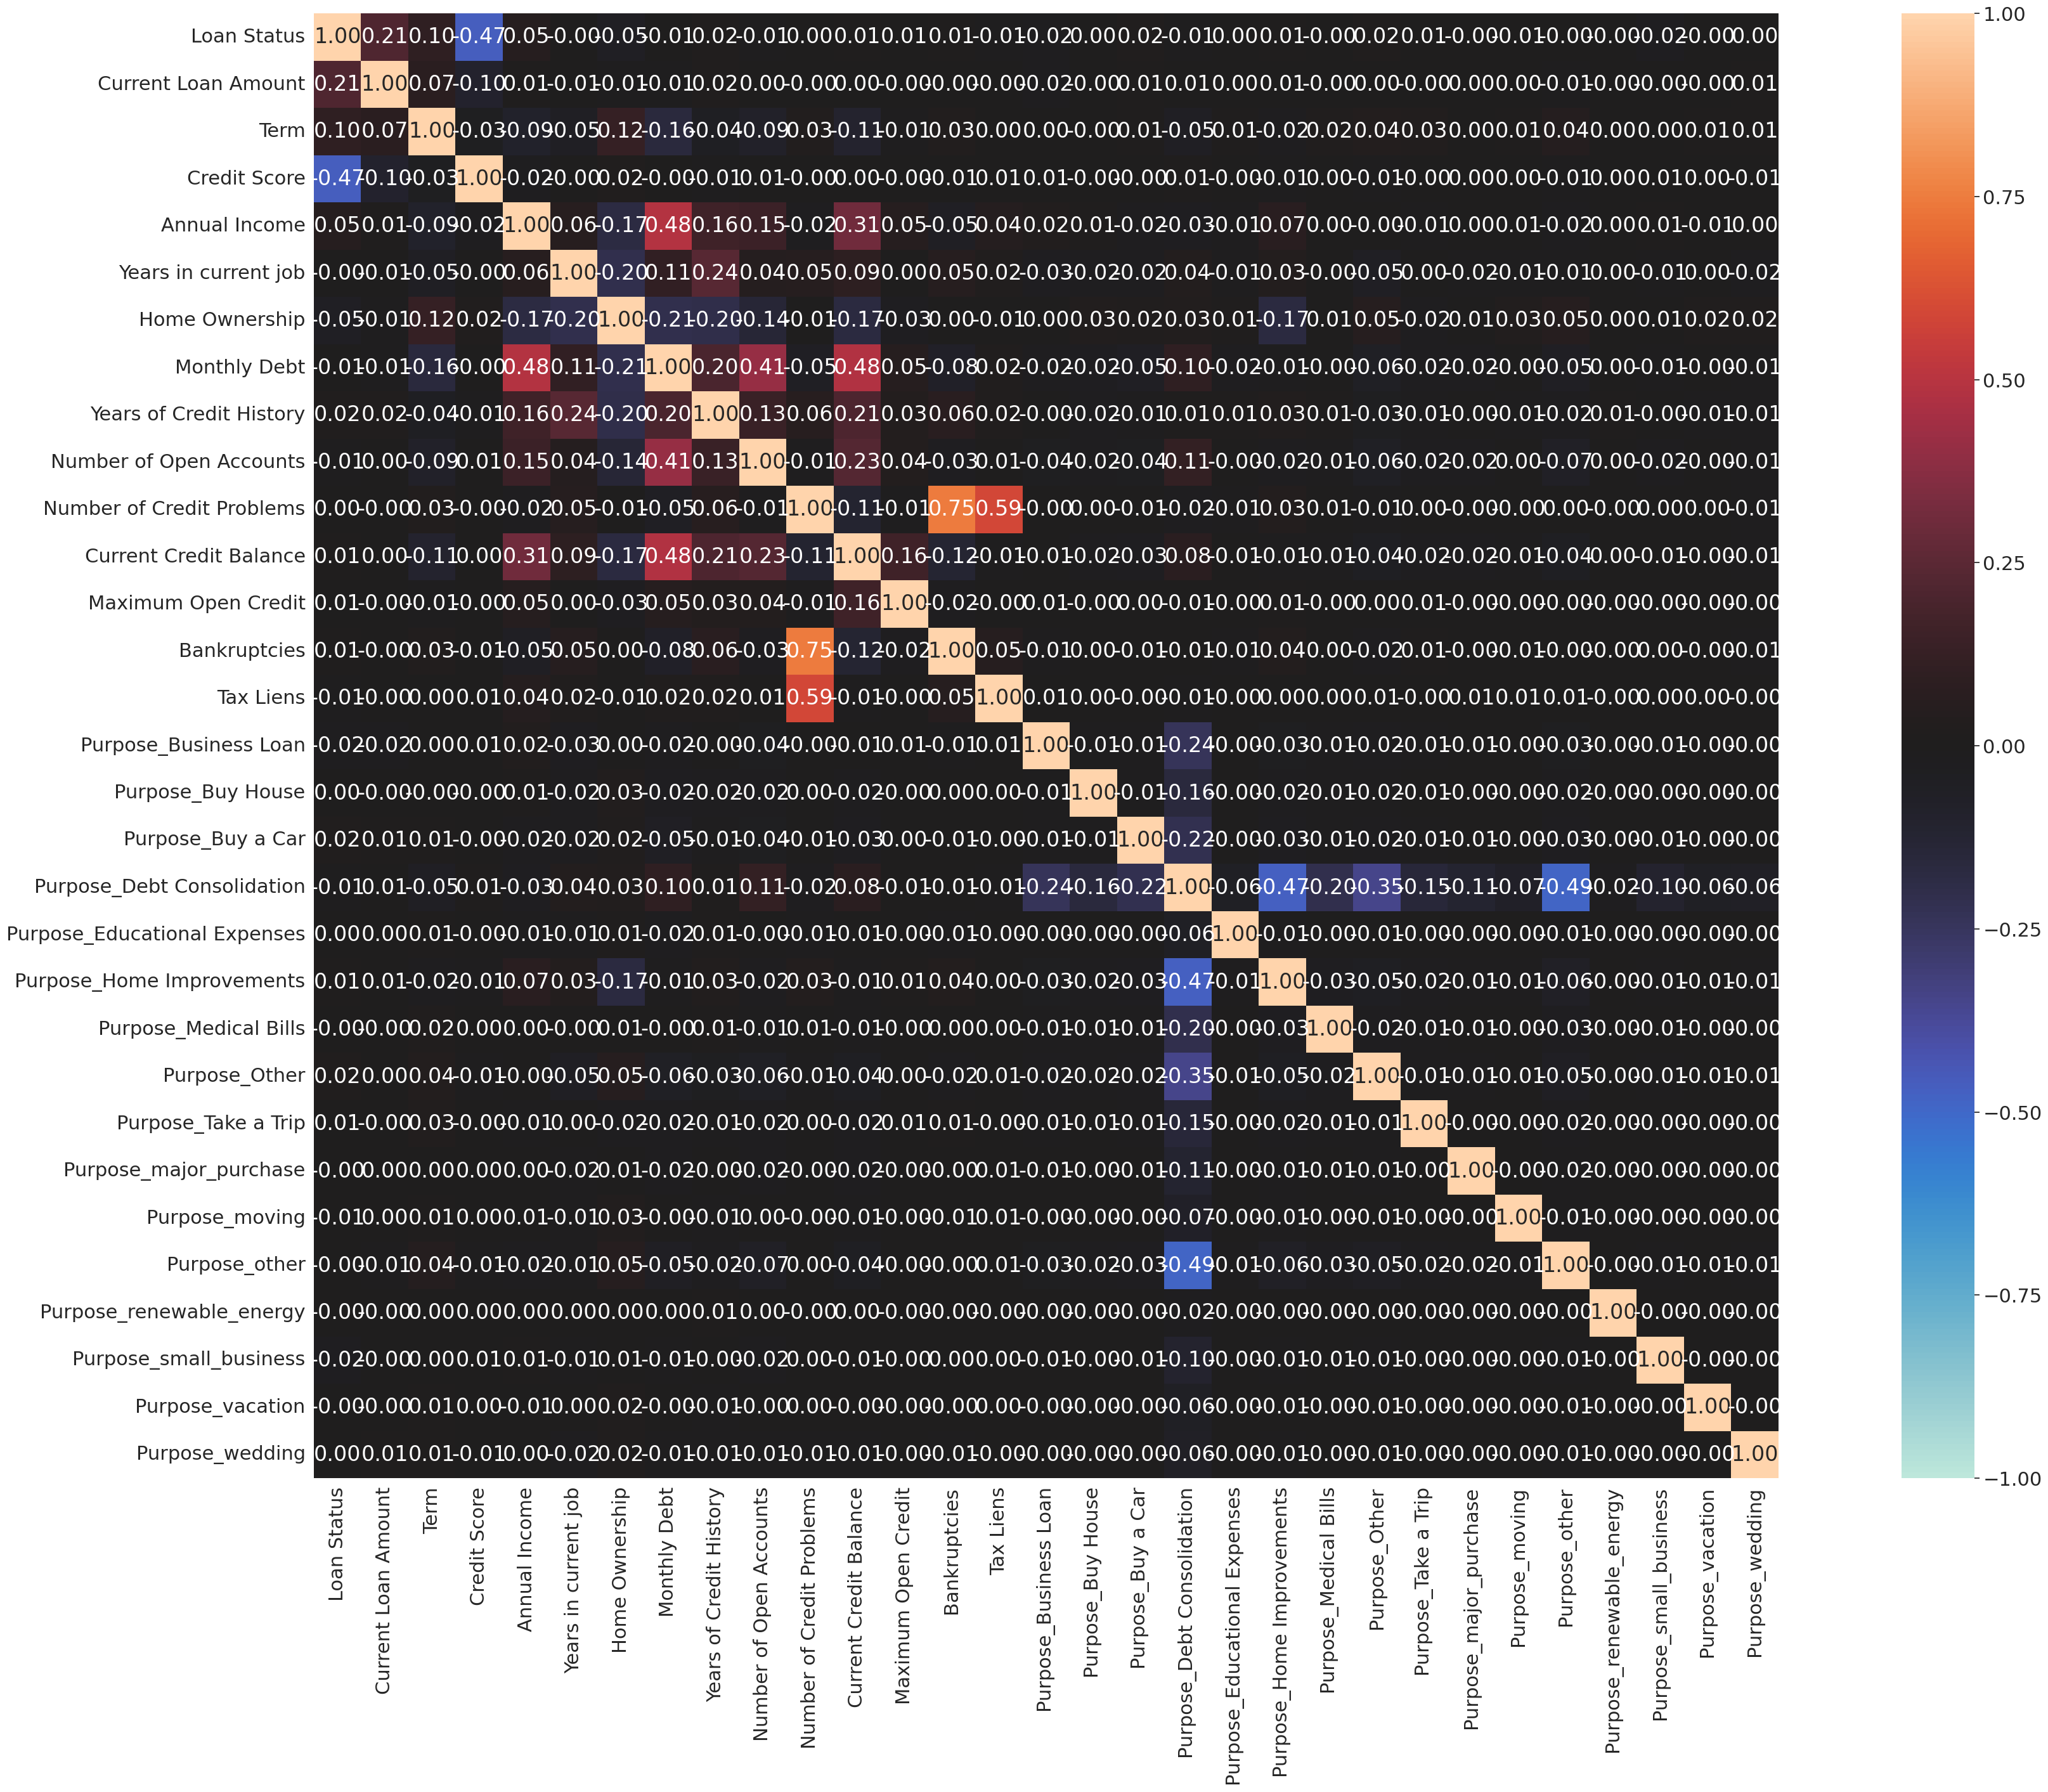

{'corr':                               Loan Status  Current Loan Amount      Term  \
 Loan Status                      1.000000             0.211442  0.100214   
 Current Loan Amount              0.211442             1.000000  0.073972   
 Term                             0.100214             0.073972  1.000000   
 Credit Score                    -0.467773            -0.096744 -0.034749   
 Annual Income                    0.053122             0.013004 -0.086589   
 Years in current job            -0.002403            -0.006035 -0.053724   
 Home Ownership                  -0.050384            -0.012715  0.119341   
 Monthly Debt                    -0.007124            -0.009322 -0.163320   
 Years of Credit History          0.021682             0.022559 -0.042383   
 Number of Open Accounts         -0.010901             0.000166 -0.085622   
 Number of Credit Problems        0.001031            -0.004423  0.027585   
 Current Credit Balance           0.009414             0.003048 -0.1

In [ ]:
!pip install dython
import numpy as np
from dython.nominal import associations
associations(encoded_loan_data, figsize=[50,30])

Your selected dataframe has 31 columns.
There are 0 columns that have missing values.
1    63301
0    17129
Name: Loan Status, dtype: int64


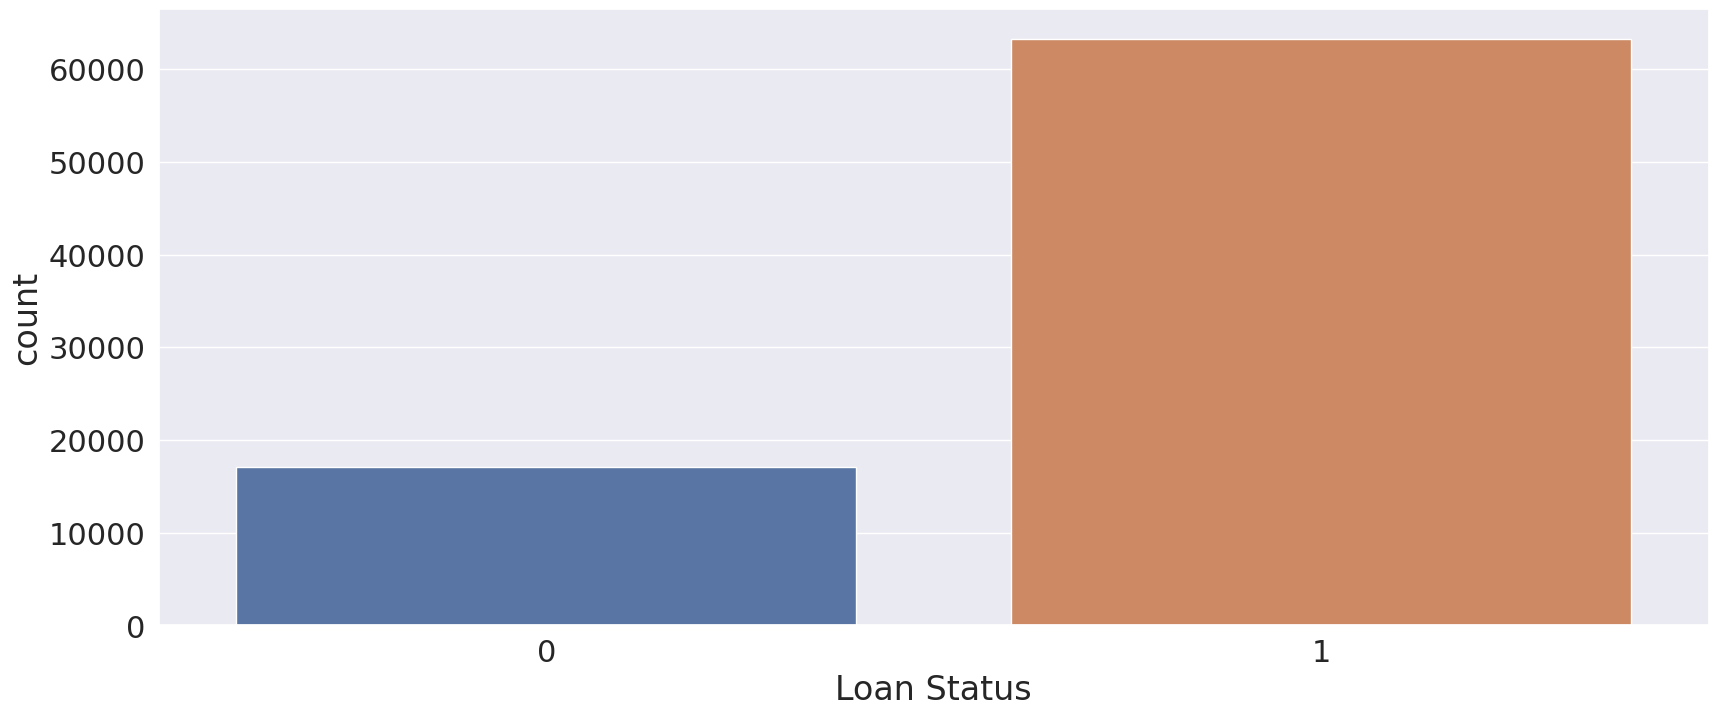

In [ ]:
#Checking the balance of the target variable

plt.figure(figsize=(20,8))
sns.countplot(x= encoded_loan_data['Loan Status'])

missing_values_table(encoded_loan_data)

print(encoded_loan_data['Loan Status'].value_counts())

In [ ]:
from collections import Counter

#Separating features and labels
x = encoded_loan_data.drop(['Loan Status'], axis=1)
y = encoded_loan_data['Loan Status']

#split train-test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)
print("Before SMOTE sampling: ", Counter(y_train))
# Apply SMOTE only to the training set
sm = SMOTE()
x_smote_train, y_smote_train = sm.fit_resample(x_train, y_train)

print("After SMOTE sampling: ", Counter(y_smote_train))

Before SMOTE sampling:  Counter({1: 50641, 0: 13703})
After SMOTE sampling:  Counter({1: 50641, 0: 50641})


In [ ]:
# Model Performance Metrics Function
def cross_val(model):
    accuracies=cross_val_score(estimator=model,X=x_smote_train,y=y_smote_train,cv=10)
    return accuracies.mean()*100

def fit_evaluate(model):
    name=model.__class__.__name__
    model.fit(x_smote_train,y_smote_train)
    y_pred=model.predict(x_test)
    cross=cross_val(model)
    a_s=accuracy_score(y_test,y_pred)*100
    pre_sc=precision_score(y_test,y_pred)*100
    rec_sc=recall_score(y_test,y_pred)*100
    f1_sc=f1_score(y_test,y_pred)*100
    roc_sc=roc_auc_score(y_test,y_pred)*100
    result=pd.DataFrame([[name,cross,a_s,pre_sc,rec_sc,f1_sc,roc_sc]],columns=['model','accuracy_train_cv','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
    return result
     

In [ ]:
# Models Performance Metrics Comparison
models=[LogisticRegression(),XGBClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
result_models=pd.DataFrame(columns=['model','accuracy_train_cv','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
for model in models:
  print(model.__class__.__name__)
  results = fit_evaluate(model)
  result_models=pd.concat([result_models,results])
result_models.sort_values(by='accuracy_test',ascending=False)

LogisticRegression
XGBClassifier
DecisionTreeClassifier
KNeighborsClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier


,model,accuracy_train_cv,accuracy_test,precision_score,recall_score,f1_score,roc_auc_score
0,XGBClassifier,88.397234,83.911476,83.866846,98.507109,90.599346,64.241879
0,RandomForestClassifier,88.796017,83.202785,84.818182,95.805687,89.977745,66.218664
0,GradientBoostingClassifier,84.752882,81.636205,84.132789,94.486572,89.009599,64.318592
0,AdaBoostClassifier,82.045517,79.534999,85.075633,89.739336,87.345276,65.783270
0,DecisionTreeClassifier,84.993711,78.260599,85.992615,86.461295,86.226318,67.209048
0,KNeighborsClassifier,78.062291,61.680965,82.861190,64.691943,72.657913,57.623263
0,LogisticRegression,67.056382,60.549546,87.529719,58.159558,69.884207,63.770380


In [ ]:
# Best model with highest accuaracy : XGBoost 
best_model=XGBClassifier()
best_model.fit(x_smote_train,y_smote_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Performance metrics for Best Model
# Best model with highest accuaracy : XGBoost 
best_model=XGBClassifier()
best_model.fit(x_smote_train,y_smote_train)
best_model_prediction=best_model.predict(x_test)
print("Performance Metrics before Tuning for XGBClassifier")
print(classification_report(y_test,best_model_prediction))
print (confusion_matrix(y_test,best_model_prediction))

Performance Metrics before Tuning for XGBClassifier
              precision    recall  f1-score   support

           0       0.85      0.30      0.44      3426
           1       0.84      0.99      0.91     12660

    accuracy                           0.84     16086
   macro avg       0.84      0.64      0.68     16086
weighted avg       0.84      0.84      0.81     16086

[[ 1031  2395]
 [  185 12475]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Random hyperparameter tuning for best model
params={'n_estimators':[100,200,300,400,500],'max_depth':[1,2,3,4,5],"learning_rate":[0.01,0.05,0.1,0.2,0.3]}
randSearchCV=RandomizedSearchCV(best_model,params,scoring='accuracy',cv=10)
randSearchCV.fit(x_smote_train,y_smote_train)
prediction=randSearchCV.predict(x_test)
print("Performance Metrics after Tuning for XGBClassifier")
print(classification_report(y_test,prediction))
print (confusion_matrix(y_test,prediction))

Performance Metrics after Tuning for XGBClassifier
              precision    recall  f1-score   support

           0       0.88      0.29      0.43      3426
           1       0.84      0.99      0.91     12660

    accuracy                           0.84     16086
   macro avg       0.86      0.64      0.67     16086
weighted avg       0.84      0.84      0.81     16086

[[  982  2444]
 [  140 12520]]


In [ ]:
# Feature importance
feature_df=pd.DataFrame({'feature':x.columns,'importance':best_model.feature_importances_})
feature_df.sort_values(by='importance',ascending=False).head(10)


,feature,importance
2,Credit Score,0.129643
1,Term,0.110463
19,Purpose_Home Improvements,0.099339
25,Purpose_other,0.093295
4,Years in current job,0.091341
12,Bankruptcies,0.079465
21,Purpose_Other,0.048770
16,Purpose_Buy a Car,0.038046
14,Purpose_Business Loan,0.037180
0,Current Loan Amount,0.036992


In [ ]:
# Simple Demonstration for Real-world Application of the Model

# Prompt the user to enter input values
print("Please enter the following information:")
loan_amount = float(input("Current Loan Amount: "))
term = int(input("Term: (0= Short Term, 1= Long Term) "))
credit_score = float(input("Credit Score: "))
annual_income = float(input("Annual Income: "))
years_in_current_job = float(input("Years in current job: "))
home_ownership = int(input("Home Ownership ( 1= Home Mortgage, 2= Own Home, 3= Rent): "))
monthly_debt = float(input("Monthly Debt: "))
years_of_credit_history = float(input("Years of Credit History: "))
num_open_accounts = float(input("Number of Open Accounts: "))
num_credit_problems = float(input("Number of Credit Problems: "))
current_credit_balance = float(input("Current Credit Balance: "))
max_open_credit = float(input("Maximum Open Credit: "))
bankruptcies = float(input("Bankruptcies: (0= No, 1= Yes)"))
tax_liens = float(input("Tax Liens: "))

purpose = input("Purpose (Business Loan, Buy House, Buy Car, Medical, Other): ")

# Set purpose variables based on user input
purpose_business_loan = 1 if purpose == 'Business Loan' else 0
purpose_buy_house = 1 if purpose == 'Buy House' else 0
purpose_buy_a_car = 1 if purpose == 'Buy a Car' else 0
purpose_debt_consolidation  = 1 if purpose == 'Debt Consolidation' else 0
purpose_educational_expenses = 1 if purpose == 'Educational Expenses' else 0
purpose_home_improvements = 1 if purpose == 'Home Improvements' else 0
purpose_medical_bills = 1 if purpose == 'Medical Bills' else 0
purpose_Other = 1 if purpose == 'Other' else 0
purpose_take_a_trip = 1 if purpose == 'Take a Trip' else 0
purpose_major_purchase = 1 if purpose == 'Major Purchase' else 0
purpose_moving = 1 if purpose == 'Moving' else 0
purpose_other = 1 if purpose == 'other' else 0
purpose_renewable_energy = 1 if purpose == 'Renewable Energy' else 0
purpose_small_business  = 1 if purpose == 'Small Business' else 0
purpose_vacation = 1 if purpose == 'Vacation' else 0
purpose_wedding = 1 if purpose == 'Wedding' else 0
randSearchCV.fit(x_smote_train,y_smote_train)

# Create input array for the model
input_data = np.array([
    loan_amount, term, credit_score, annual_income,years_in_current_job, home_ownership,
    monthly_debt, years_of_credit_history, num_open_accounts, num_credit_problems, current_credit_balance, 
    max_open_credit, bankruptcies, tax_liens, purpose_business_loan, purpose_buy_house, purpose_buy_a_car, purpose_debt_consolidation,
    purpose_educational_expenses, purpose_home_improvements, purpose_medical_bills, purpose_Other, purpose_take_a_trip, 
    purpose_major_purchase, purpose_moving, purpose_other, purpose_renewable_energy, purpose_small_business, purpose_vacation, purpose_wedding
]).reshape(1, -1)

# Make prediction with the best model after turning
prediction = randSearchCV.predict(input_data)

# Print the prediction result
if prediction == 1:
  # print("\nResult:")
  print("The loan is likely to be approved.")
  print("prediction: ", prediction)
else:
  # print("\nResult:")
  print("The loan is unlikely to be approved.")
  print("prediction: ", prediction)



Please enter the following information:
Current Loan Amount: 445412
Term: (0= Short Term, 1= Long Term) 0
Credit Score: 709
Annual Income: 1167493
Years in current job: 8
Home Ownership ( 1= Home Mortgage, 2= Own Home, 3= Rent): 1
Monthly Debt: 5214.74
Years of Credit History: 17.2
Number of Open Accounts: 6
Number of Credit Problems: 1
Current Credit Balance: 228190
Maximum Open Credit: 416746
Bankruptcies: (0= No, 1= Yes)1
Tax Liens: 0
Purpose (Business Loan, Buy House, Buy Car, Medical, Other): Home Improvements
The loan is likely to be approved.
prediction:  [1]
